In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import scipy.stats as ss
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Некоторые методы предобработки данных

- Визуализация
- Удаление и корректировка выбросов
- Обработка пропущенных значений
- Обработка категориальных признаков
- Нормализация данных
- Отбор признаков (feature selection)
   - Выявление коррелированных признаков
- Конструирование признаков (feature engineering)

## 1. Загружаем данные

# Предсказание претензии

Предположим, что вы директор страховой компании и столкнулись с проблемой повышения числа претензий.Вы хотите повысить качество своих услуг и желаете предсказывать статус претензии.
Загрузим данные о претензиях в сингапурской сраховой компании: 

In [2]:
url = "https://raw.githubusercontent.com/GoshanX/MachineLearningUNN/master/travel_insurance.csv"
data_raw = pd.read_csv(url)

Таблица содержит данные о более 63 тысяч заявок, созданных в этой компании. Для каждой заявки указаны ее страховое агентство и его тип, канал подачи заявки, наименование продуктов страхования путешествий,продолжительность поездки, пункт назначения путешествия, сумма продаж полисов страхования путешествий, комиссия, полученная за агентство по страхованию путешествий, пол застрахованного лица, возраст застрахованного лица.

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одной заявке) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [3]:
data_raw.shape

(63326, 11)


Метод `data_raw.head()` отображает первые строки (по умолчанию, 5 строк) таблицы

In [4]:
data_raw.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


А вот последние строки:

In [5]:
data_raw.tail()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63
63325,JZI,Airlines,Online,Basic Plan,No,22,HONG KONG,26.0,9.10,F,35


Мы видим, что столбцы (признаки) имеют имена

- `Agency` - агенство
- `Agency Type` - тип агенства
- `Distribution Channel` - канал подачи заявки
- `Product Name` - наименованеи продукта страхования
- `Claim` - статус претензии (`'Yes'` - есть, `'No'` - нет)
- `Duration` - проолжительность поездки в днях
- `Destination` - местоположение
- `Net Sales` - сумма продаж полисов
- `Commision (in value)` - комиссия
- `Gender` - пол
- `Age` - возраст


Требуется предсказать бинарный признак `Claim` по остальным признакам.

Имена столбцов (признаков) можно получить таким образом:

In [6]:
data_raw.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

Имена строк (совпадают с номерами)

### Доступ к отдельным элементам и выделение подтаблиц (slice)

  Cпособ доступа    |      Элемент  | Подтаблица
 ------------------ | ------------- | -----------
  Доступ по имени   | `at`, `loc`   | `loc`
  Доступ по номеру  | `iat`, `iloc` | `iloc`


In [7]:
data_raw.at[2, 'Destination']

'AUSTRALIA'

In [8]:
data_raw.loc[2, 'Destination']

'AUSTRALIA'

In [9]:
data_raw.iat[2, 6]

'AUSTRALIA'

In [10]:
data_raw.iloc[2, 6]

'AUSTRALIA'

### Подтаблицы

`loc` и `iloc` (но не `at` и `iat`) позволяют выделять не только отдельные элементы, но и подтаблицы (slice)

In [11]:
data_raw.loc[[2,3,5], ['Agency', 'Claim', 'Destination']]

,Agency,Claim,Destination
2,CWT,No,AUSTRALIA
3,CWT,No,AUSTRALIA
5,JZI,No,UNITED STATES


In [12]:
data_raw.iloc[[2,3,5], [4,6,7]]

,Claim,Destination,Net Sales
2,No,AUSTRALIA,-49.5
3,No,AUSTRALIA,-39.6
5,No,UNITED STATES,-121.0


### Целые строки или столбцы:

In [13]:
data_raw.loc[:, ['Agency', 'Destination']] 

,Agency,Destination
0,CBH,MALAYSIA
1,CBH,MALAYSIA
2,CWT,AUSTRALIA
3,CWT,AUSTRALIA
4,CWT,ITALY
...,...,...
63321,JZI,JAPAN
63322,JZI,CHINA
63323,JZI,MALAYSIA
63324,JZI,VIET NAM


In [14]:
data_raw.loc[[2, 5], :] # или data_raw.loc[[2, 5], ] или data_raw.loc[[2, 5]]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44


### Доступ по булевой маске

In [15]:
df = data_raw.iloc[:4, 4:8]
df

,Claim,Duration,Destination,Net Sales
0,No,186,MALAYSIA,-29.0
1,No,186,MALAYSIA,-29.0
2,No,65,AUSTRALIA,-49.5
3,No,60,AUSTRALIA,-39.6


In [16]:
df.loc[[True, True, False, True], [False, True, True, False]] # или iloc

,Duration,Destination
0,186,MALAYSIA
1,186,MALAYSIA
3,60,AUSTRALIA


In [17]:
df.loc[[True, True, False, True]] # или iloc

,Claim,Duration,Destination,Net Sales
0,No,186,MALAYSIA,-29.0
1,No,186,MALAYSIA,-29.0
3,No,60,AUSTRALIA,-39.6


In [18]:
df[[True, True, False, True]]

,Claim,Duration,Destination,Net Sales
0,No,186,MALAYSIA,-29.0
1,No,186,MALAYSIA,-29.0
3,No,60,AUSTRALIA,-39.6


## Визуализация данных

Проведем работу с количественными признаками, а именно:
  1. Для каждого количественного признака построим гистограмму;
  2. Для пар таких признаков построим диаграммы рассеяния;

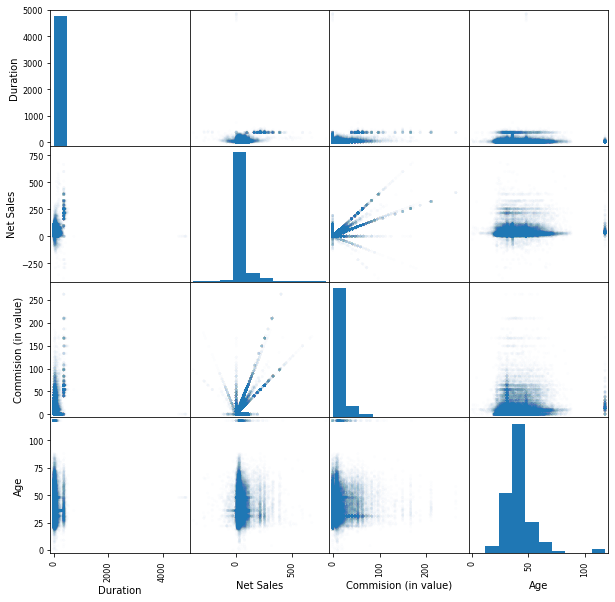

In [19]:
scatter_matrix(data_raw, alpha = .01, figsize = (10, 10))
pass

Построим матрицу корреляции для количественных признаков

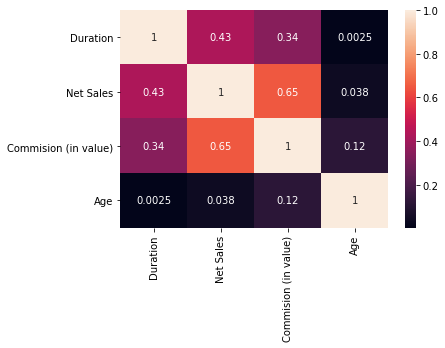

In [20]:
sns.heatmap(data_raw.corr(),annot=True)
pass

In [21]:
data_raw.describe()


,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


## 2. Боремся с выбросами (outliers)

Понятно, что продолжительность поездки не может быть отрицательной.
Поэтому проверим на неотрицательность `Duration`.


In [22]:
df=data_raw['Duration']<0
df.sum()


5

Можно вот так:

In [23]:
data_raw['Duration'].describe()


count    63326.000000
mean        49.317074
std        101.791566
min         -2.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

Мы видим, что существует 5 отрицательных значений продолжительности поездки. Возможно, это ошибки в данных. Заменим отрицательное значение средним:

In [24]:
data_raw.loc[data_raw['Duration'] < 0, 'Duration'] = 49.317
data = data_raw

Проверим еще раз на неотрицательность продолжительность поездки:

In [25]:
data['Duration'].describe()

count    63326.000000
mean        49.321062
std        101.790576
min          0.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

$100\%$ всех значений `'Duration'` теперь больше нуля. 

## 3. Работа с пропущенными значениями

In [26]:
data.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [27]:
data['Gender'].shape

(63326,)

Из 63326 значений 45107 пропущено, из чего можно сделать вывод либо об удалении столбца, либо об заполнении столбца значением "Not specified". Удалим столбец, так как информация о том, что пол не указан не даст нам дополнительной пользы.

In [28]:
data = data.drop('Gender', axis=1)

In [29]:
data.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

## 3. Работа с категориальными признаками

Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

По умолчанию этот метод дает информацию только о количественных признаках.
Получим информацию о категориальных:

In [30]:
data.describe(include='object')

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination
count,63326,63326,63326,63326,63326,63326
unique,16,2,2,26,2,149
top,EPX,Travel Agency,Online,Cancellation Plan,No,SINGAPORE
freq,35119,45869,62219,18630,62399,13255


Построим матрицу корреляции для категориальных признаков

In [31]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

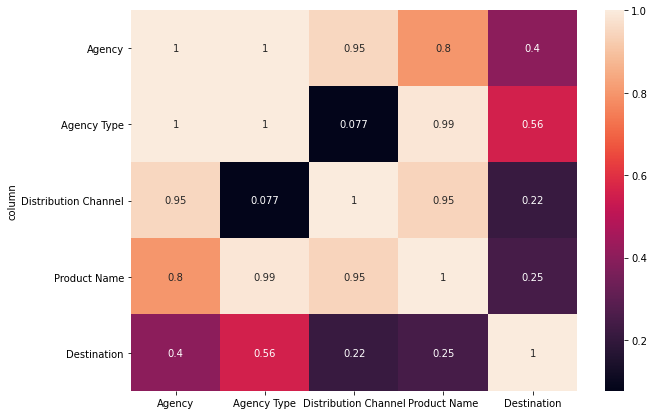

In [32]:
categorical=['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',  'Destination']
cramers=pd.DataFrame({i:[cramers_v(data[i],data[j]) for j in categorical] for i in categorical})
cramers['column']=[i for i in categorical if i not in ['memberid']]
cramers.set_index('column',inplace=True)

#categorical correlation heatmap

plt.figure(figsize=(10,7))
sns.heatmap(cramers,annot=True)
plt.show()

Можно заметить, что признак "Agency Type" сильно коррелирован с признаком "Agency" и "Product Name", а значит его можно отбросить

In [33]:
data=data.drop('Agency Type',axis=1)


Разделим категориальные и числовые признаки

In [34]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Agency', 'Distribution Channel', 'Product Name', 'Claim', 'Destination']
['Duration', 'Net Sales', 'Commision (in value)', 'Age']


Проведем векторизацию категориальных признаков


In [35]:
data_describe = data.describe(include = ['object'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Distribution Channel', 'Claim'] ['Agency', 'Product Name', 'Destination']


In [36]:

data['Distribution Channel'].unique()

array(['Offline', 'Online'], dtype=object)

In [37]:
data.at[data['Distribution Channel'] == 'Offline', 'Distribution Channel'] = 0
data.at[data['Distribution Channel'] == 'Online', 'Distribution Channel'] = 1
data['Distribution Channel'].describe()

count     63326
unique        2
top           1
freq      62219
Name: Distribution Channel, dtype: int64

In [38]:
data['Claim'].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
data.at[data['Claim'] == 'No', 'Claim'] = 0
data.at[data['Claim'] == 'Yes', 'Claim'] = 1
data['Claim'].describe()

count     63326
unique        2
top           0
freq      62399
Name: Claim, dtype: int64

In [40]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])

## Нормализация количественных признаков


In [41]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.321062,40.702018,9.809992,39.969981
std,101.790576,48.845637,19.804388,14.017010
min,0.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [42]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Duration,Net Sales,Commision (in value),Age
count,6.332600e+04,6.332600e+04,6.332600e+04,6.332600e+04
mean,-1.782789e-15,-3.198147e-14,-1.301532e-15,9.608340e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.845347e-01,-8.797142e+00,-4.953443e-01,-2.851534e+00
25%,-3.961178e-01,-4.647706e-01,-4.953443e-01,-3.545678e-01
50%,-2.684046e-01,-2.901389e-01,-4.953443e-01,-2.832259e-01
75%,3.614222e-02,1.494091e-01,8.785973e-02,2.161673e-01
max,4.746686e+01,1.574957e+01,1.381966e+01,5.566809e+00


Соединим все данные в одну таблицу

In [43]:

data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(63326, 197)


## Разделение данных


Разобьем данные на X и Y


In [44]:
X = data.drop(('Claim'), axis = 1)
y = data['Claim']
y=y.astype('int')

In [45]:
print(X.shape)
print(y.shape)


(63326, 196)
(63326,)


In [79]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 79)


Избавимся от несбалансированности в тестовой выборке

In [67]:
#test = pd.concat((X_test, y_test), axis = 1)
#print(data.shape)

(63326, 197)


In [68]:
#position_col = test['Claim']
#num_0 = position_col.value_counts()[0]
#print(num_0)
#test = pd.concat([ test[test['Claim']==0],
#                                test[test['Claim']==1].sample(num_0, replace=True)])

31213


In [69]:
#print(test.shape)


(62426, 197)


In [70]:
#X_test = test.drop(('Claim'), axis = 1)
#y_test = test['Claim']
#y_test=y_test.astype('int')

Попытка избавится от несбалансированности путем удовения выборки ни к чему хорошему не привела

## KNN

In [88]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Вычислим ошибки


In [89]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0015791302150775352 0.027855856993967722


In [90]:
err_test = 1 - knn.score(X_test, y_test)

In [91]:
err_test

0.027855856993967754

In [92]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[30753   460]
 [  422    28]]


Ошибки первого типа -460 (прогноз: претензия есть, а на самом деле ее нет), но зато метод совершил 422 ошибок второго типа, то есть сказал, что претензи нет, а она на самом деле есть. Так произошло из-за несбалансированности классов - модель всегда выбирает первый класс, в будущем мы изучим другие метрики и будем более точно определять ошибки. И всего в 28 случаях предсказание претензии совпало с реальностью.